## Eliminacion de variables Dummy
El proceso consiste en tener un dataset o variables independientes mucho mas simplificadas. Esto se puede lograr a traves del siguiente comando:

`pd.get_dummies(df['Gender'], prefix="Gender").iloc[:,1:]`

Elimina la rebundacia de la primera fila basicamente.

## Transformacion de variables para conseguir una relacion no lineal

Estamos hablando de modelos para tipo de funciones de orden superior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [93]:
data = pd.read_csv('../Machine Learning/python-ml-course/datasets/auto/auto-mpg.csv')
data.head()
#mpg : millas por galeon
#cilindros
#desplazamiento
#potencia
#aceleracion
#modelo

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [3]:
data.shape

(406, 9)

Text(0, 0.5, 'millas por galeon')

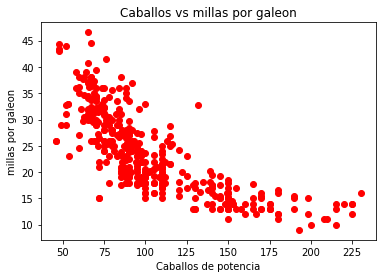

In [4]:
%matplotlib inline
data.dropna(axis=0,how='any',inplace=True)
#data['horsepower'] = data['horsepower'].dropna(axis=0,how='any')
plt.plot(data['horsepower'],data['mpg'], "ro")
plt.xlabel("Caballos de potencia")
plt.title("Caballos vs millas por galeon")
plt.ylabel('millas por galeon')

### Modelo de regresion lineal
* mpg = a + b * horsepower

In [5]:
#al parecer se borraron mal los datos null
a = np.random.randn(len(data))
check = (a<0.8)
tranding = data[check]
testing = data[~check]
X = tranding["horsepower"]
Y = tranding["mpg"]
lm = LinearRegression()
lm.fit(X[:,np.newaxis],Y)
#este metodo no acepta arreglos, por eso lo convertimos en arreglos bidireccional

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
type(X)
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [7]:
type(X[:,np.newaxis])

numpy.ndarray

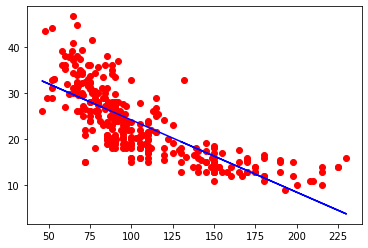

In [8]:
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X, lm.predict(X[:,np.newaxis]), c='blue')

In [9]:
#Evitar problemas
X1 = X[:,np.newaxis]

In [10]:
lm.score(X1,Y)

0.6023799438981559

In [11]:
test = lm.predict(testing["horsepower"][:,np.newaxis])
SSD = sum((testing["mpg"] - test)**2)
RSE = np.sqrt(SSD/(len(testing)-1))
y_mean = np.mean(Y)
err = RSE/y_mean
SSD , RSE , err

(1733.5785443744212, 4.840117466151088, 0.20826045318772068)

**Como podemos apreciar, el error que se genera con este testing es del 23%**

### Modelo de Regresion Cuadratica
* mpg = a + b * horsepower^2

In [12]:
X_data = X**2
X_data = X[:,np.newaxis]

In [13]:
lm = LinearRegression()
lm.fit(X_data,Y)
lm.score(X_data,Y)

0.6023799438981559

In [14]:
SSD = sum((testing["mpg"] - test)**2)
RSE = np.sqrt(SSD/(len(testing)-1))
y_mean = np.mean(Y)
err = RSE/y_mean
SSD , RSE , err

(1733.5785443744212, 4.840117466151088, 0.20826045318772068)

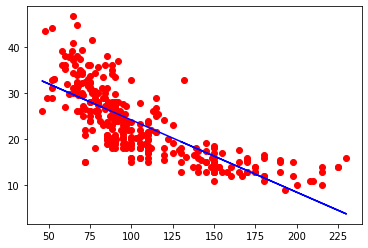

In [15]:
%matplotlib inline
plt.plot(X_data,Y,'ro')
plt.plot(X_data, lm.predict(X[:,np.newaxis]), c='blue')

### Modelo de Regresion Cuadratica y Lineal
* mpg = a + b * horsepower + c * horsepower^2

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [17]:
poly = PolynomialFeatures(degree=2)

In [18]:
x_data = poly.fit_transform(X1)

In [19]:
lm = LinearRegression()
lm.fit(x_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm.score(x_data,Y)
#Coeficiente R^2
# Mientras mas cercano a 1 quiere decir que mas ajustado es el modelo (osea mejor es)

0.6834145880321397

In [21]:
lm.intercept_

57.37686810935505

In [22]:
lm.coef_

array([ 0.        , -0.47307677,  0.00125445])

`mpg = 55.44369550201631 - 0.44452255 * hp + 0.00115883 * hp^2`

In [23]:
def regresion_validation(X_data , Y , Y_pred):
    SSD = sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    err = RSE/y_mean
    print('SSD:',SSD,'\nRSE: ',RSE,'\nerr: ',err)

Regresion de grado: 1
--------------------
R^2: 0.6023799438981559
Var: 39.78776980032701
Coef: [ 0.         -0.15637907]
SSD: 7653.591656791462 
RSE:  4.9214049581393216 
err:  0.21175808935840332


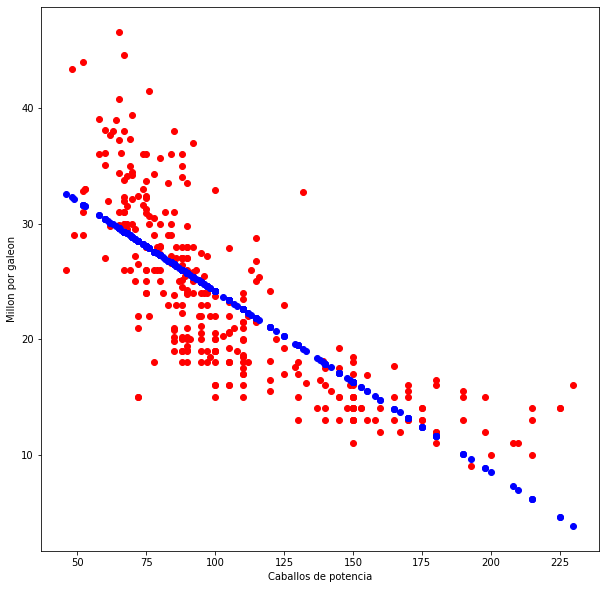



Regresion de grado: 2
--------------------
R^2: 0.6834145880321397
Var: 57.37686810935505
Coef: [ 0.         -0.47307677  0.00125445]
SSD: 6093.795900170798 
RSE:  4.391373844373401 
err:  0.1889519238617089


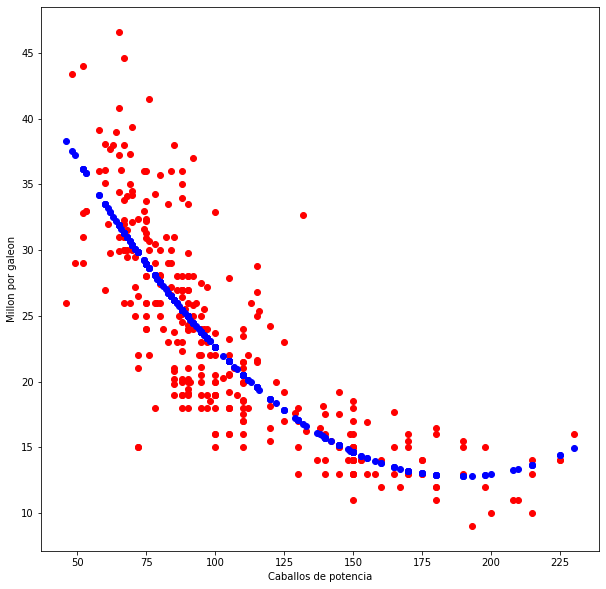



Regresion de grado: 3
--------------------
R^2: 0.6840854145302788
Var: 61.364898605096975
Coef: [ 0.00000000e+00 -5.80402373e-01  2.13758900e-03 -2.23203089e-06]
SSD: 6080.883492935495 
RSE:  4.386718841324782 
err:  0.18875162850704544


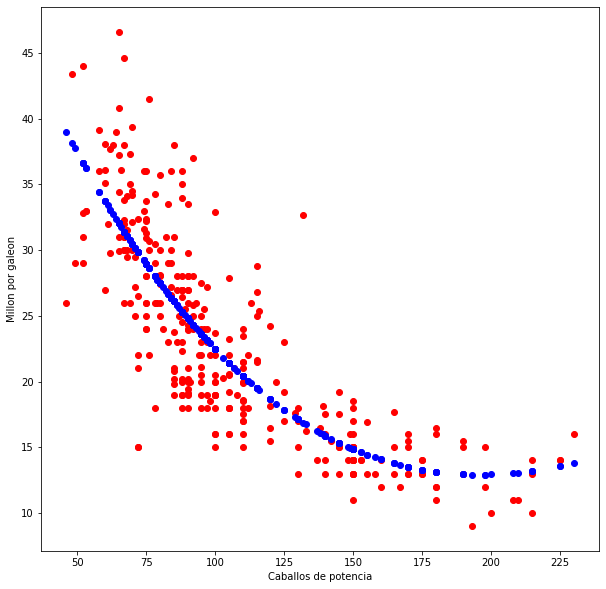



Regresion de grado: 4
--------------------
R^2: 0.6848318374507621
Var: 50.237013962072986
Coef: [ 0.00000000e+00 -1.67950132e-01 -3.19157034e-03  2.62459603e-05
 -5.34616932e-08]
SSD: 6066.5159675831355 
RSE:  4.381533446232376 
err:  0.1885285114567973


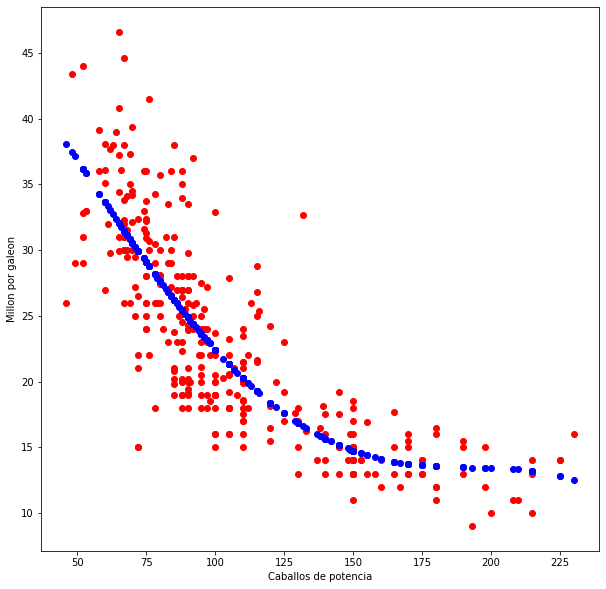



Regresion de grado: 5
--------------------
R^2: 0.6923862966191492
Var: -35.769336454749784
Coef: [ 0.00000000e+00  3.84742962e+00 -7.36531848e-02  6.08936831e-04
 -2.33495014e-06  3.40103625e-09]
SSD: 5921.103922150675 
RSE:  4.32870311291007 
err:  0.18625532919692314


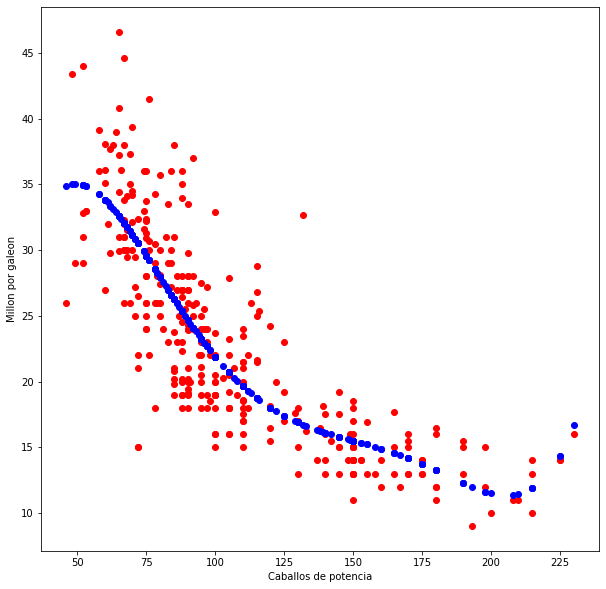

In [26]:
for d in range(1,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X1)
    lm = LinearRegression()
    lm.fit(X_data,Y)
    print('Regresion de grado: '+str(d))
    print('--------------------')
    print('R^2:',lm.score(X_data,Y))
    print('Var:',lm.intercept_)
    print('Coef:',lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))
    %matplotlib inline
    plt.figure(figsize=(10,10))
    plt.plot(X1,Y,'ro')
    plt.plot(X1,  lm.predict(X_data) , 'bo')
    plt.ylabel("Millon por galeon")
    plt.xlabel("Caballos de potencia")
    plt.show()
    print('\n')

# Problemas de los outliers
Son un conjunto de variables que se encuentran alejados de nuestro esquema de trabajo.

Cuando hacemos un scatter plot se identifican como puntos alejados de la nube global.

In [94]:
# Puntos bastante alejados de la grafica
data[((data['displacement']>250) & (data['mpg']>35)) | ((data['displacement']>300) & (data['mpg']>20))]

mpg  cylinders  displacement  horsepower  weight  acceleration  \
258  20.2          8         302.0       139.0    3570          12.8   
305  23.0          8         350.0       125.0    3900          17.4   
372  26.6          8         350.0       105.0    3725          19.0   
395  38.0          6         262.0        85.0    3015          17.0   

     model year  origin                           car name  
258          78       1               mercury monarch ghia  
305          79       1                  cadillac eldorado  
372          81       1              oldsmobile cutlass ls  
395          82       1  oldsmobile cutlass ciera (diesel)

Text(200, 45, 'Ejemplo de punto fuera de lo normal')

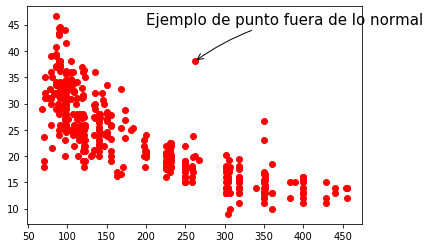

In [84]:
plt.plot(data['displacement'],data['mpg'],'ro')

# Hago un señalización con flecha
plt.annotate('Ejemplo de punto fuera de lo normal',
         xy=(262, 38),
         xytext=(200,45),
         fontsize=15,
         arrowprops=dict(arrowstyle="->",
         connectionstyle="arc3,rad=.1"))

In [34]:
lm = LinearRegression()
X = data['displacement'][:,np.newaxis]
Y = data['mpg']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm.score(X,Y)

0.6482294003193044

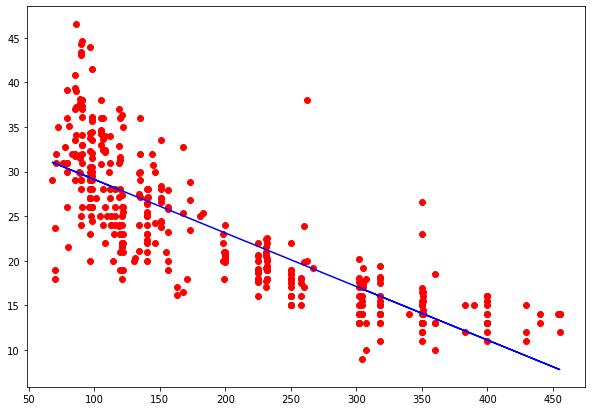

In [49]:
plt.figure(figsize=(10,7))
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X),'blue')

In [90]:
data = data.drop([258,305,372,395])
X = data['displacement'][:,np.newaxis]
Y = data['mpg']
lm.fit(X,Y)
print(lm.score(X,Y))

0.6703131555875477


Como se puede apreciar, ahora el R^2 es 4 puntos mejor

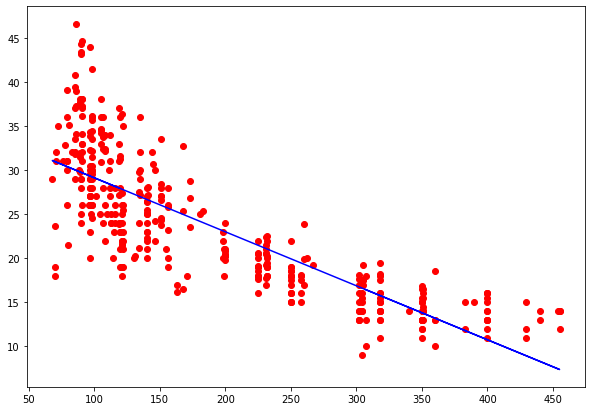

In [92]:
plt.figure(figsize=(10,7))
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X),'blue')

**Tener en cuenta que haciendo un diagrama de caja y bigotes podriamos eliminar todos esos valores que estan fuera de la caja**

# Ultimo apunte a analizar
### Residuos
### Varianza no constante en los terminos de error
* Heterocedasticidad: Mientras mas lejos del eje de coordenada es valor de los errores va variando. (se puede calcular teniendo en cuenta otros modelos no lineales)
* Homocedasticidad: En el transcurso de todos los datos, el error se va manteniendo constante.
### Puntos con elevado apalancamiento
Son basicamente los valores que estan muy alejados de los demas. Se puede calcular a traves de la formula de Leverage.
